# Módulo 7 - Regressão Linear Simples


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import shapiro, kstest, probplot, zscore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import pingouin as pg

### Carga dos Dados


In [2]:
# carregar o dataset e checar sua estrutura
df_pontuacao = pd.read_csv("./datasets/pontuacao_teste.csv")
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [3]:
# exibir as primeiras linhas
df_pontuacao.head()

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85


### Análise Exploratória de Dados


Nesta aula, exploramos a Análise Exploratória de Dados (EDA) para um conjunto de dados que contém informações sobre horas de estudo e pontuação em um teste. Começamos analisando as medidas estatísticas das variáveis, como média, mediana e desvio padrão. Em seguida, utilizamos um gráfico de dispersão para visualizar a relação entre as variáveis. Observamos que há uma relação forte entre as horas de estudo e a pontuação no teste, mas não é uma relação linear perfeita. Também verificamos a presença de outliers usando um boxplot e constatamos que não há outliers nas horas de estudo ou na pontuação. Além disso, calculamos a correlação entre as variáveis e constatamos que há uma correlação forte entre elas. Por fim, analisamos a distribuição das variáveis usando histogramas e observamos que há uma concentração maior de dados acima de 40 horas de estudo. Com base nessas análises, concluímos que um modelo de regressão linear simples pode ser adequado para prever a pontuação no teste com base nas horas de estudo.


In [4]:
# medidas estatísticas das variáveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

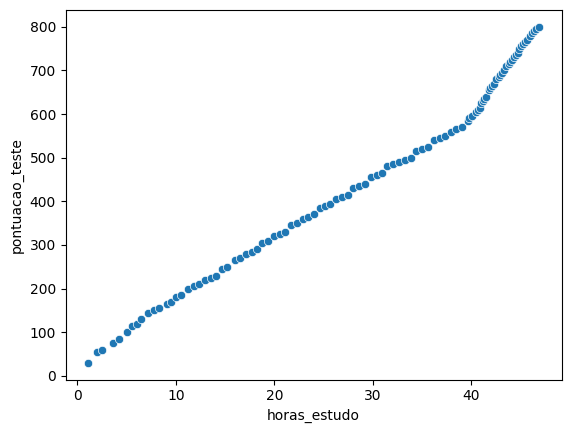

In [5]:
# plot de dispersão
# X = horas_estudo
# Y = pontuação_teste
sns.scatterplot(data=df_pontuacao, x="horas_estudo", y="pontuacao_teste")

<Axes: ylabel='horas_estudo'>

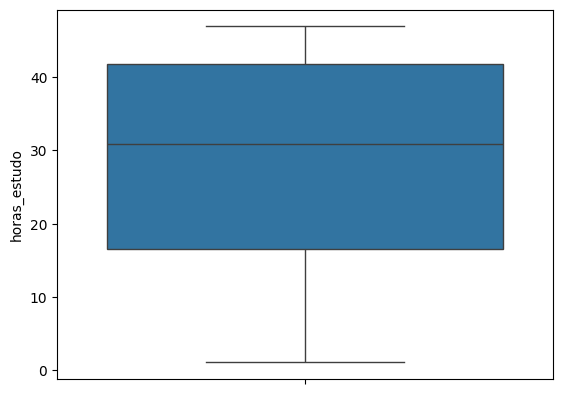

In [6]:
# Verificação preliminar de outliers - plot boxplot
sns.boxplot(df_pontuacao, y="horas_estudo")

<Axes: >

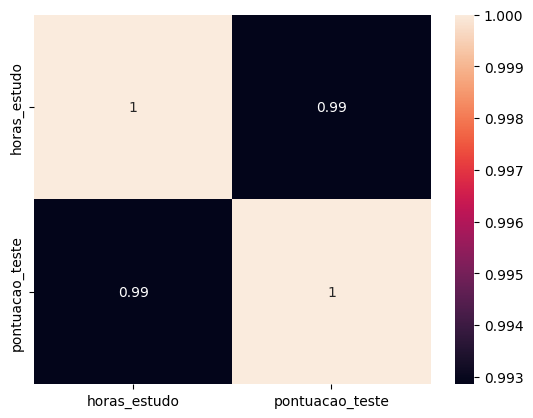

In [7]:
# verificar correlação - Pearson (para regressão linear)
sns.heatmap(df_pontuacao.corr("pearson"), annot=True)

<Axes: >

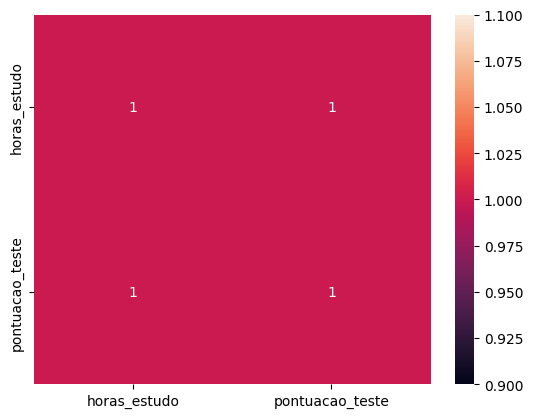

In [8]:
# verificar correlação - Spearman (relações não lineares)
sns.heatmap(df_pontuacao.corr("spearman"), annot=True)

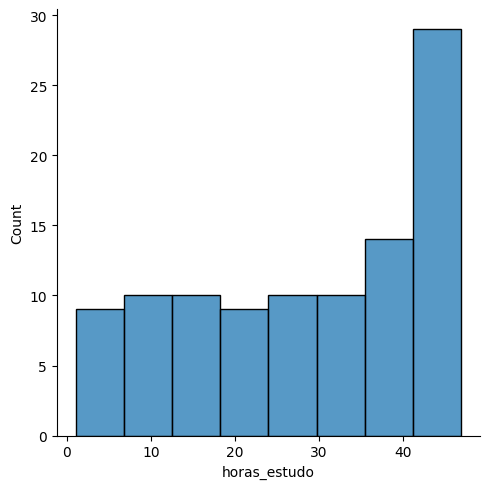

In [9]:
# Histograma das variaáveis - distribuição de horas de estudo
sns.displot(df_pontuacao, x="horas_estudo")

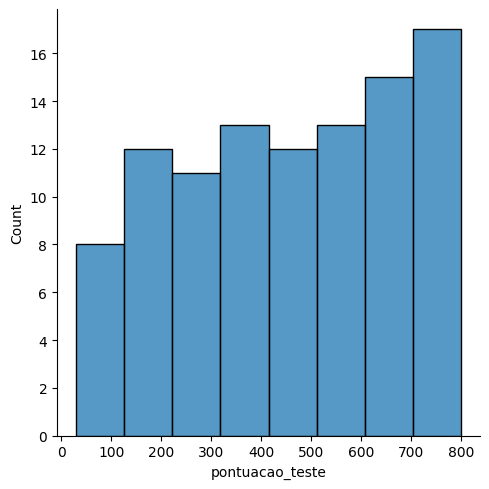

In [10]:
# Histograma das variaáveis - distribuição das pontuações do teste
sns.displot(df_pontuacao, x="pontuacao_teste")

### Treinamento do Modelo


Neste vídeo, começamos a preparar o modelo para ser treinado. A primeira etapa é dividir os dados entre treino e teste. Para isso, criamos duas estruturas para armazenar as variáveis independentes (X) e dependentes (Y). Em seguida, utilizamos a função `train_test_split()` para dividir o dataset em treino e teste, definindo que 30% dos dados serão usados para teste e 70% para treinamento. Após a divisão, instanciamos o modelo de regressão linear e treinamos o modelo utilizando o conjunto de treinamento. Por fim, imprimimos a equação da reta resultante, que representa a relação entre as variáveis X e Y.


In [11]:
# dividir dataset entre treino e teste
# quando temos apenas uma feature (variável), é necessário ajustar o formato (shape)
X = df_pontuacao["horas_estudo"].values.reshape(-1, 1)
Y = df_pontuacao["pontuacao_teste"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=50
)

In [12]:
# instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [13]:
# treinar o modelo
reg_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
# imprimir a equação da reta - y = ax + b
print(
    "A equação da reta é y = {:4f}x + {:4f}".format(
        reg_model.coef_[0][0], reg_model.intercept_[0]
    )
)

A equação da reta é y = 15.642619x + 8.476601


### Validação do Modelo


#### Análise Métricas - MAE e MSE


Nesta aula, vamos começar a validar o modelo que treinamos anteriormente. Faremos isso através de métricas e análise de resíduos. Primeiro, calcularemos os valores preditos com base no conjunto de testes para verificar se o modelo está fazendo boas previsões em dados não observados durante o treinamento. Usaremos métricas como R-squared, que mede a proporção da variação explicada pela variável independente, e Mean Absolute Error (MAE), que calcula a diferença média entre os valores preditos e os valores reais. O MAE é uma métrica fácil de interpretar e menos sensível a outliers. Vamos calcular essas métricas e interpretar os resultados.


In [15]:
# Predição dos valores baseado no conjunto de testes
Y_pred = reg_model.predict(X_test)

In [16]:
# Calcular métrica R-squad ou coeficiente de Determinação
# R2 representa a proporção na variação dentro da variável dependente, explicada pela variável indenpendente
r2_score(Y_test, Y_pred)

0.9828400452912442

In [17]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Média (Y_test - Y_pref)
# Fácil de interpretar e menos sensível a outliers
mean_absolute_error(Y_test, Y_pred)

22.957470277134615

In [18]:
# Calcular métrica MSE (Mean Squared Error)
# MAE = Média (Y_test - Y_pref)^2
# Não é fácil de interpretar, mais sensível a outliers e penaliza grandes errros
mean_squared_error(Y_test, Y_pred)

766.9972992416427

#### Análise Métricas - RMSE


Nesta aula, discutimos sobre métricas de avaliação de modelos de regressão. Apresentamos o conceito de RMSE (Root Mean Squared Error), que é uma métrica que penaliza os grandes erros, mas é fácil de interpretar. Explicamos que o cálculo do RMSE é semelhante ao MSE (Mean Squared Error), mas com a diferença de que é aplicada uma raiz quadrada no resultado. Demonstramos como calcular o RMSE e como interpretar seus valores. Em seguida, fizemos uma análise gráfica simples para visualizar os dados preditos e reais do conjunto de teste. Concluímos que é importante observar as diferenças entre os valores preditos e reais, tanto através das métricas quanto visualmente, para avaliar a performance do modelo.


In [19]:
# Calcular métrica RMSE (Root Mean Squared Error)
# MAE = Raiz (Y_test - Y_pref)^2
# É fácil de interpretar
mean_squared_error(Y_test, Y_pred, squared=False)

27.69471608884342

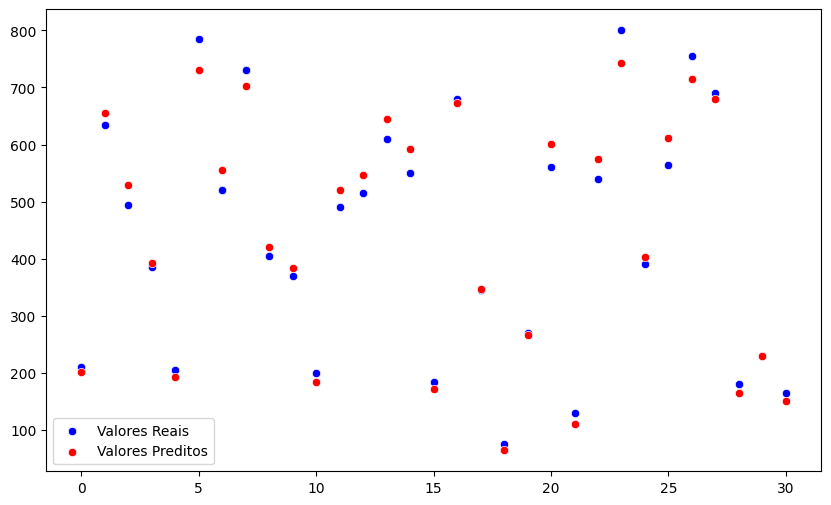

In [20]:
# análise gráfica
x_axis = range(len(Y_test))
plt.figure(figsize=(10, 6))
# reshape = transforma os dados num array unidimensional
sns.scatterplot(x=x_axis, y=Y_test.reshape(-1),
                color="blue", label="Valores Reais")
sns.scatterplot(x=x_axis, y=Y_pred.reshape(-1),
                color="red", label="Valores Preditos")
plt.legend()
plt.show()

#### Análise Gráfica de Resíduos


Nesta aula, vamos realizar a análise de resíduos para validar nosso modelo de regressão. Os resíduos são os erros do modelo, ou seja, a diferença entre os valores reais e os valores previstos. Vamos calcular os resíduos e convertê-los para uma escala padronizada. Em seguida, faremos uma análise gráfica dos resíduos para verificar a linearidade e a homogeneidade das variâncias. Observamos que os resíduos não estão totalmente dentro do intervalo esperado para a linearidade e que há padrões nos dados, indicando que o modelo pode não ser adequado. Além disso, faremos testes estatísticos de normalidade nos resíduos.


In [21]:
# calcular os resíduos
residues = Y_test - Y_pred

In [22]:
# calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrãore
residues_std = zscore(residues)

**verificar linearidade do modelo:**

- se o modelo estiver entre -2 e +2 (na escala padrão)

**verificar homogeneidade das variâncias (Homocedasticidade)**

- valores estiverem em torno da reta, temo homocedasticidade, caso contrário se houver alguma tendência ou padrão (formam um cone ou funil), há heterocedasticidade.


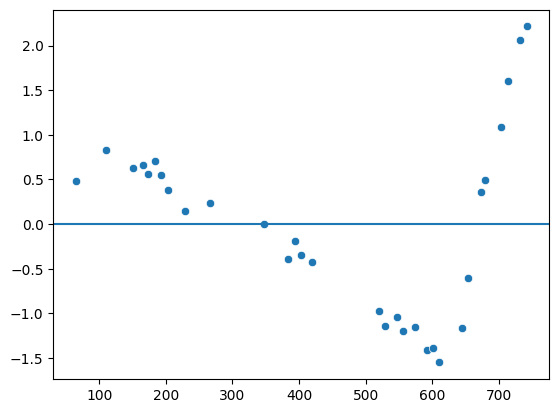

In [23]:
sns.scatterplot(x=Y_pred.reshape(-1), y=residues_std.reshape(-1))
plt.axhline(y=0)

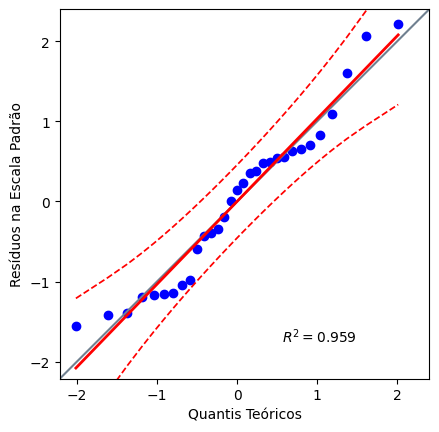

In [24]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição normal.
pg.qqplot(residues_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")
plt.show()

Pelo ponto de vista da análise gráfica dos resíduos, este modelo pode não satisfazer predições.


#### Teste de Normalidade de Resíduos


Nesta aula, discutimos sobre a importância da validação técnica e de negócio em modelos de regressão linear. Realizamos dois testes estatísticos de normalidade: o teste de Shapiro-Wilks e o teste de Kolmogorov-Smirnov. O teste de Shapiro-Wilks nos permite verificar se os resíduos do modelo seguem uma distribuição normal. Já o teste de Kolmogorov-Smirnov nos ajuda a validar se os resíduos seguem uma distribuição normal específica, como a distribuição normal. Analisamos os resultados desses testes, considerando o valor de p-valor. Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula de que os resíduos seguem uma distribuição normal. Caso contrário, rejeitamos a hipótese nula. Discutimos também outras abordagens que podem ser utilizadas para melhorar o modelo, como a obtenção de mais dados e a utilização de validação cruzada com K-fold. Por fim, ressaltamos a importância de validar o modelo com especialistas no domínio do problema e considerar outras variáveis que possam explicar melhor os resultados.


In [25]:
# Teste de normalidade - Shapiro Wilk
# H0 - segue distribuição normal
# H1 - não segue distribuição normal
# se p-valor > 0.05 não rejeita H0, caso contrário, rejeitamos:
stat_shapiro, p_value_shapiro = shapiro(residues.reshape(-1))
print(
    "Estatística do teste: {:.4f} e p-value: {:.4f}".format(
        stat_shapiro, p_value_shapiro
    )
)

Estatística do teste: 0.9501 e p-value: 0.1566


In [26]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - segue distribuição normal
# H1 - não segue distribuição normal
# se p-valor > 0.05 não rejeita H0, caso contrário, rejeitamos:
stat_ks, p_value_ks = kstest(residues.reshape(-1), "norm")
print("Estatística do teste: {:.4f} e p-value: {:.10f}".format(stat_ks, p_value_ks))

Estatística do teste: 0.4836 e p-value: 0.0000003395


O teste de normalidade de Kolmogorov-Smirnov rejeita a distribuição normal, dentro deste universo amostral e do problema levantado. É possível que uma maior obtenção de dados seja necessária.


### Fazendo Predições


Nesta aula, aprendemos como fazer predições com um modelo de regressão linear. Primeiro, calculamos a pontuação prevista para um determinado número de horas de estudo, usando o método predict do modelo. Em seguida, discutimos a importância de avaliar o erro das previsões e como isso pode afetar a tomada de decisões. Também exploramos como inverter a equação da reta para determinar quantas horas de estudo são necessárias para atingir uma determinada pontuação-alvo. Por fim, aprendemos a salvar o modelo treinado em um arquivo para uso posterior. No próximo vídeo, veremos como usar esse modelo salvo para fazer previsões através de uma API.


In [29]:
# qual a pontuação prevista para um tempo de estudo igual a 30.4 horas?
predicted_pontuation = reg_model.predict([[30.4]])[0]
predicted_pontuation_scalar = predicted_pontuation.item()

formatted_pontuation = "{:.2f}".format(predicted_pontuation_scalar)
print(f"Pontuação prevista: {formatted_pontuation}")

Pontuação prevista: 484.01


In [34]:
# quantas horas de estudo são necessárias para obter uma pontuação de 600 pontos?
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
predicted_hours = (600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]
print(f"Horas de estudo prevista: {predicted_hours:.2f}")

Horas de estudo prevista: 37.81


### Salvar modelo


In [35]:
import joblib

joblib.dump(reg_model, "./modelo_regressao.plk")

['./modelo_regressao.plk']